In [1]:
import yfinance as yf

In [2]:
data = yf.download('BTC-USD', start='2020-01-01', end='2025-01-01', interval='1d')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185


In [4]:
print(data.head())

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095


In [5]:
print(data.tail())

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-12-27  94164.859375  97294.843750  93310.742188  95704.976562   
2024-12-28  95163.929688  95525.898438  94014.289062  94160.187500   
2024-12-29  93530.226562  95174.875000  92881.789062  95174.054688   
2024-12-30  92643.210938  94903.320312  91317.132812  93527.195312   
2024-12-31  93429.203125  96090.601562  91914.031250  92643.250000   

Price            Volume  
Ticker          BTC-USD  
Date                     
2024-12-27  52419934565  
2024-12-28  24107436185  
2024-12-29  29635885267  
2024-12-30  56188003691  
2024-12-31  43625106843  


In [6]:
data['SMA_short'] = data['Close'].rolling(window=50).mean()  
data['SMA_long'] = data['Close'].rolling(window=200).mean()  


data['Signal'] = 0
data['Signal'][data['SMA_short'] > data['SMA_long']] = 1  
data['Signal'][data['SMA_short'] < data['SMA_long']] = -1 


data['Position'] = data['Signal'].shift(1)  
data['Returns'] = data['Close'].pct_change()  
data['Strategy'] = data['Returns'] * data['Position']  

C:\Users\user\AppData\Local\Temp\ipykernel_16328\1975493952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['SMA_short'] > data['SMA_long']] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_16328\1975493952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['SMA_short'] > data['SMA_long']] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_16328\1975493952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [7]:
data['Cumulative_returns'] = (1 + data['Strategy']).cumprod()

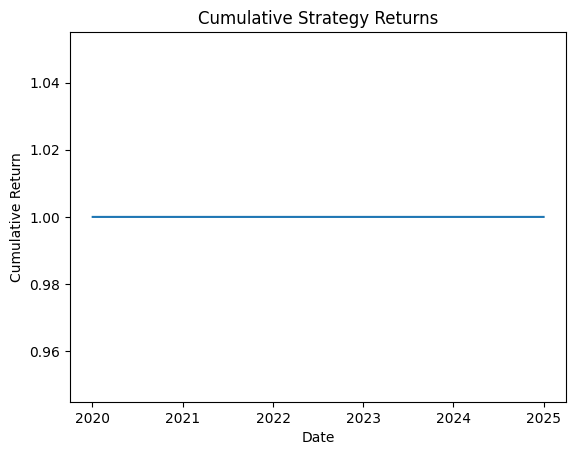

In [8]:
import matplotlib.pyplot as plt
plt.plot(data['Cumulative_returns'])
plt.title('Cumulative Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

In [9]:
print(f"Final Cumulative Return: {data['Cumulative_returns'].iloc[-1]}")

Final Cumulative Return: 1.0


In [10]:
from binance.client import Client

In [11]:
api_key = 'k29xG1d2VmWWg3QuQnaNdeVHHAWphxv7EKBAzPrFCSG4cyMEzeE4EhrRcjHW7mf0'
api_secret = 'kecXb0jFc9WnPj6J0FFzdAoyJdH7Hi00F7aKqbXcFhFg6wfsmXK82us1dHFLXSS1'

In [12]:
client = Client(api_key, api_secret)

In [13]:
symbol = 'BTCUSDT'
price = client.get_symbol_ticker(symbol=symbol)
print(f"Current price of {symbol}: {price['price']}")

Current price of BTCUSDT: 83579.38000000


In [14]:
import hmac
import hashlib
import time
import sys
import requests
import pandas as pd
from numpy import nan as npNaN
import numpy as np


In [17]:
sys.modules['numpy'].NaN = np.nan

import pandas_ta as ta

ModuleNotFoundError: No module named 'pkg_resources'

In [ ]:
api_key = "8WqKUQl04b7kQEw7yYTDqw630AgRz3ZvWEAXebQdbFAtESoMSpBrY6qzETLeHlcF"
api_secret = "8OuGjqM6hZcmIk0TB43DurSRXZQql6CfVrJy240BZk1DTcBkMRhNnKVZbS9AXEKF"

In [ ]:
BASE_URL = 'https://api.binance.com'
KLINES_ENDPOINT = '/api/v3/klines'
TICKER_PRICE_ENDPOINT = '/api/v3/ticker/price'

In [ ]:
def create_signed_request(api_secret, params):
    query_string = '&'.join([f"{key}={value}" for key, value in params.items()])
    signature = hmac.new(api_secret.encode('utf-8'), query_string.encode('utf-8'), hashlib.sha256).hexdigest()
    return f"{query_string}&signature={signature}"

In [ ]:
def get_historical_data(symbol, interval, limit=100):
    url = f"{BASE_URL}{KLINES_ENDPOINT}"
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        
        columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 
                   'close_time', 'quote_asset_volume', 'trades', 'taker_buy_base', 'taker_buy_quote', 'ignore']
        df = pd.DataFrame(data, columns=columns)
        df['close'] = df['close'].astype(float)
        return df
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

In [ ]:

def get_current_price(symbol):
    url = f"{BASE_URL}{TICKER_PRICE_ENDPOINT}"
    params = {'symbol': symbol}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return float(response.json()['price'])
    else:
        print(f"Error fetching price: {response.status_code}")
        return None


In [ ]:
def perform_analysis(df):
  
    numeric_columns = ['open', 'high', 'low', 'close', 'volume']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
  
    df['rsi'] = ta.rsi(df['close'], length=14)
    df['sma'] = ta.sma(df['close'], length=20)
    df['ema'] = ta.ema(df['close'], length=50)
    df['macd'] = ta.macd(df['close'])['MACD_12_26_9']
    df['macd_signal'] = ta.macd(df['close'])['MACDh_12_26_9']
    df['stoch'] = ta.stoch(df['high'], df['low'], df['close'])['STOCHk_14_3_3']
    df['atr'] = ta.atr(df['high'], df['low'], df['close'], length=14)
    
   
    df['support'] = df['low'].rolling(window=14, min_periods=1).min()
    df['resistance'] = df['high'].rolling(window=14, min_periods=1).max()
    
   
    recent_high = df['high'].rolling(window=14, min_periods=1).max()
    recent_low = df['low'].rolling(window=14, min_periods=1).min()
    df['fib_23.6'] = recent_high - (recent_high - recent_low) * 0.236
    df['fib_38.2'] = recent_high - (recent_high - recent_low) * 0.382
    df['fib_50.0'] = recent_high - (recent_high - recent_low) * 0.5
    df['fib_61.8'] = recent_high - (recent_high - recent_low) * 0.618
    
    return df

In [ ]:

def recommend_trade(df):
    latest_data = df.iloc[-1]
    recommendation = None

   
    if latest_data['rsi'] < 30 and latest_data['close'] > latest_data['sma']:
        entry = latest_data['close']
        stop_loss = latest_data['sma']
        take_profit = entry + (entry - stop_loss) * 2
        reason = "RSI indicates oversold conditions, and price is above SMA."
        recommendation = {
            'strategy': 'RSI + SMA Crossover',
            'entry': entry,
            'stop_loss': stop_loss,
            'take_profit': take_profit,
            'reason': reason
        }

 
    elif latest_data['macd'] > latest_data['macd_signal'] and df['macd'].iloc[-2] <= df['macd_signal'].iloc[-2]:
        entry = latest_data['close']
        stop_loss = entry - latest_data['atr'] * 1.5
        take_profit = entry + latest_data['atr'] * 3
        reason = "MACD crossover indicates bullish momentum."
        recommendation = {
            'strategy': 'MACD Crossover',
            'entry': entry,
            'stop_loss': stop_loss,
            'take_profit': take_profit,
            'reason': reason
        }

   
    elif latest_data['close'] > latest_data['fib_38.2'] and latest_data['close'] < latest_data['fib_61.8']:
        entry = latest_data['close']
        stop_loss = latest_data['fib_23.6']
        take_profit = latest_data['fib_61.8']
        reason = "Price is bouncing from the 38.2% Fibonacci level."
        recommendation = {
            'strategy': 'Fibonacci Retracement Bounce',
            'entry': entry,
            'stop_loss': stop_loss,
            'take_profit': take_profit,
            'reason': reason
        }

    return recommendation

In [ ]:
def explain_recommendation(df, recommendation):
    latest_data = df.iloc[-1]
    explanation = (
        f"Current Price: {latest_data['close']}\n"
        f"RSI: {latest_data['rsi']} (Oversold: <30, Overbought: >70)\n"
        f"SMA (20): {latest_data['sma']}\n"
        f"MACD: {latest_data['macd']}\n"
        f"ATR: {latest_data['atr']}\n"
        f"Support: {latest_data['support']}\n"
        f"Resistance: {latest_data['resistance']}\n"
        f"Fibonacci Levels (23.6%, 38.2%, 50%, 61.8%): "
        f"{latest_data['fib_23.6']}, {latest_data['fib_38.2']}, {latest_data['fib_50.0']}, {latest_data['fib_61.8']}\n"
    )

    if recommendation:
        explanation += (
            f"\nRecommendation:\n"
            f"- Strategy: {recommendation['strategy']}\n"
            f"- Entry: {recommendation['entry']}\n"
            f"- Stop-Loss: {recommendation['stop_loss']}\n"
            f"- Take-Profit: {recommendation['take_profit']}\n"
            f"- Reason: {recommendation['reason']}\n"
        )
    else:
        explanation += "\nNo trade recommendation: Market conditions do not meet any strategy criteria."

    return explanation